# 1. Load data and packages

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [253]:
#pip install mapclassify

In [254]:
#pip install geopandas

In [ ]:
#conda install -c plotly plotly=4.14.3

In [144]:
import pandas as pd
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt #if using matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import plotly.express as px #if using plotly
import geopandas as gpd
import numpy as np
import mapclassify

# 2. Load shapes blocks

In [3]:
file = "GIS/tl_2010_17_tabblock10.shp"
map_df = gpd.read_file(file)

In [5]:
map_df2=map_df.loc[lambda df: df['COUNTYFP10'] == '031', :] #Cook
map_df2['entry']=0
map_df2['GEOID10']=pd.to_numeric(map_df2['GEOID10'], errors='coerce')

/Users/ijnunez/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

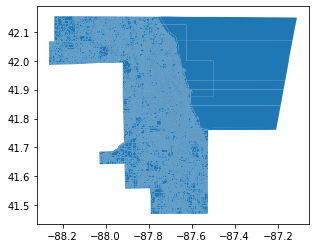

In [6]:
map_df2.plot()

# 3. Load data on incumbent providers by census block (FCC Form 477)

In [95]:
month='Dec'
year='2019'
file = 'Data/IL-Fixed-'+month+year+'.csv'
entry=pd.read_csv(file)

entry['MaxAdDown']=pd.to_numeric(entry['MaxAdDown'], errors='coerce')
entry['MaxAdUp']=pd.to_numeric(entry['MaxAdUp'], errors='coerce')
entry['TechCode']=pd.to_numeric(entry['TechCode'], errors='coerce')
entry['Consumer']=pd.to_numeric(entry['Consumer'], errors='coerce')
entry['Business']=pd.to_numeric(entry['Business'], errors='coerce')
entry.loc[entry['Business']>= 1, 'Consumer']=1



entry=entry.loc[lambda df: df['MaxAdDown'] >25, :]
entry=entry.loc[lambda df: df['MaxAdUp'] >10, :]
#entry=entry.loc[lambda df: df['TechCode'] ==50, :]
entry=entry.loc[lambda df: df['Consumer'] >=1, :]
entry=entry

entry['block'] = entry['BlockCode'].apply(str).str[11:15]
entry['tract'] = entry['BlockCode'].apply(str).str[5:11]
entry['county'] = entry['BlockCode'].apply(str).str[2:5]
entry['state'] = entry['BlockCode'].apply(str).str[0:2]
entry2=entry.loc[lambda df: df['county'] == '031', :] #Cook county
entry2

,LogRecNo,Provider_Id,FRN,ProviderName,DBAName,HoldingCompanyName,HocoNum,HocoFinal,StateAbbr,BlockCode,TechCode,Consumer,MaxAdDown,MaxAdUp,Business,block,tract,county,state
11363,963161,54378,5076286,"Comelec Services, Inc.",Comelec Internet Services,"Comelec Services, Inc.",340015,"Comelec Services, Inc.",IL,170313301003000,70,1,40.0,15.0,1,3000,330100,031,17
22062,2404287,54768,19297043,"Webpass, Inc.","Webpass, Inc.",Google Fiber Inc.,240041,Alphabet Inc.,IL,170310310002013,70,1,1000.0,1000.0,1,2013,031000,031,17
22063,2404288,54768,19297043,"Webpass, Inc.","Webpass, Inc.",Google Fiber Inc.,240041,Alphabet Inc.,IL,170310312004002,70,1,200.0,200.0,1,4002,031200,031,17
22064,2404289,54768,19297043,"Webpass, Inc.","Webpass, Inc.",Google Fiber Inc.,240041,Alphabet Inc.,IL,170310313001007,70,1,500.0,500.0,1,1007,031300,031,17
22065,2404290,54768,19297043,"Webpass, Inc.","Webpass, Inc.",Google Fiber Inc.,240041,Alphabet Inc.,IL,170310317003000,70,1,500.0,500.0,1,3000,031700,031,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046520,36677223,67052,2860856,Illinois Bell Telephone Company,AT&T Illinois,AT&T Inc.,130077,AT&T Inc.,IL,170311508003016,50,1,1000.0,1000.0,0,3016,150800,031,17
2046521,36677224,67052,2860856,Illinois Bell Telephone Company,AT&T Illinois,AT&T Inc.,130077,AT&T Inc.,IL,170311301003014,50,1,1000.0,1000.0,0,3014,130100,031,17
2046522,36677225,67052,2860856,Illinois Bell Telephone Company,AT&T Illinois,AT&T Inc.,130077,AT&T Inc.,IL,170311502003010,50,1,1000.0,1000.0,0,3010,150200,031,17
2046523,36677226,67052,2860856,Illinois Bell Telephone Company,AT&T Illinois,AT&T Inc.,130077,AT&T Inc.,IL,170316911004021,50,1,1000.0,1000.0,0,4021,691100,031,17


In [96]:
entry2.columns
entry2['HocoFinal'].unique()
entry2['HoldingCompanyName'].unique()
entry2['DBAName'].unique()
entry2['ProviderName'].unique()
entry2['TechCode'].unique()

Index(['LogRecNo', 'Provider_Id', 'FRN', 'ProviderName', 'DBAName',
       'HoldingCompanyName', 'HocoNum', 'HocoFinal', 'StateAbbr', 'BlockCode',
       'TechCode', 'Consumer', 'MaxAdDown', 'MaxAdUp', 'Business', 'block',
       'tract', 'county', 'state'],
      dtype='object')

array(['Comelec Services, Inc.', 'Alphabet Inc.',
       'Mid Century Telephone Co-operative', 'Radiate Holdings, LP',
       'Midwest Telecom of America, Inc.', 'Comcast Corporation',
       'Access Media Holdings, LLC', 'Iroute Inc.', 'A+ Wireless, Inc.',
       'Stratus Networks, Inc.', 'Mediacom Communications Corp.',
       'WideOpenWest Finance, LLC', 'XL Broadband, Inc.',
       'Cable One, Inc.', 'Consolidated Communications, Inc.',
       'Verizon Communications Inc.', 'AT&T Inc.'], dtype=object)

array(['Comelec Services, Inc.', 'Google Fiber Inc.',
       'Mid Century Telephone Co-operative', 'Radiate Holdings, LP',
       'Midwest Telecom of America, Inc.', 'Comcast Corporation',
       'Access Media Holdings, LLC', 'Iroute Inc.', 'A+ Wireless, Inc.',
       'Stratus Networks, Inc.', 'Mediacom Communications Corp.',
       'WideOpenWest Finance, LLC', 'XL Broadband, Inc.', 'Canle One',
       'Consolidated Communications, Inc.', 'Verizon Communications Inc.',
       'AT&T Inc.'], dtype=object)

array(['Comelec Internet Services', 'Webpass, Inc.',
       'Mid Century Communications', 'RCN', 'MidwestTelecomofAmerica',
       'Comcast', 'AccessMedia3', 'UpstreamNetwork', '12Global',
       'Advantage Wireless', 'Stratus Networks', 'Mediacom Illinois LLC',
       'WOW', 'XLBroadband', 'NewWave', 'Consolidated Communications',
       'Verizon Wireless', 'AT&T Illinois'], dtype=object)

array(['Comelec Services, Inc.', 'Webpass, Inc.',
       'Mid Century Telephone Cooperative, Inc.',
       'RCN Telecom Services of Illinois, LLC',
       'Midwest Telecom of America, Inc.',
       'COMCAST CABLE COMMUNICATIONS, LLC', 'Access Media Holdings, LLC',
       'Iroute Inc DBA 12Global.com',
       'A+ Wireless, Inc. d/b/a Advantage Wireless',
       'Stratus Networks, Inc.', 'Mediacom Illinois LLC',
       'WideOpenWest Cleveland, LLC', 'XL Broadband, Inc.',
       'Telecommunications Management, LLC d/b/a NewWave Communications',
       'Consolidated Communications Holdings, Inc.', 'Cellco Partnership',
       'Illinois Bell Telephone Company'], dtype=object)

array([70, 50, 42, 43, 30, 40, 12])

In [97]:
entry_Midcentury=entry2.loc[lambda df: (df['HocoFinal'] == 'Mid Century Telephone Co-operative')|(df['HoldingCompanyName'] == 'Mid Century Telephone Co-operative'), :]
entry_Comcast=entry2.loc[lambda df: (df['HocoFinal'] == 'Comcast Corporation')|(df['HoldingCompanyName'] == 'Comcast Corporation'), :]
entry_Google=entry2.loc[lambda df: (df['HocoFinal'] == 'Google Fiber Inc.')| (df['HocoFinal'] == 'Alphabet Inc.')|(df['HoldingCompanyName'] == 'Google Fiber Inc.'), :]
entry_ATT=entry2.loc[lambda df: (df['HocoFinal'] == 'AT&T Inc.')|(df['HoldingCompanyName'] == 'AT&T Inc.'), :]
entry_Radiate=entry2.loc[lambda df: (df['HocoFinal'] == 'Radiate Holdings, LP')|(df['HocoFinal'] == 'ABRY Partners')|(df['HoldingCompanyName'] == 'Radiate Holdings, LP')|(df['HoldingCompanyName'] == 'ABRY Partners'), :]
entry_Verizon=entry2.loc[lambda df: (df['HocoFinal'] == 'Verizon Communications Inc.')|(df['HoldingCompanyName'] == 'Verizon Communications Inc.'), :]
entry_Charter=entry2.loc[lambda df: (df['HocoFinal'] == 'Consolidated Communications, Inc.')|(df['HoldingCompanyName'] == 'Consolidated Communications, Inc.'), :]
entry_XL=entry2.loc[lambda df: (df['HocoFinal'] == 'XL Broadband, Inc.')|(df['HoldingCompanyName'] == 'XL Broadband, Inc.'), :]


# 4. Merge entry and blocks

In [98]:
entry_Google['BlockCode']=pd.to_numeric(entry_Google['BlockCode'], errors='coerce')
entry_Midcentury['BlockCode']=pd.to_numeric(entry_Midcentury['BlockCode'], errors='coerce')
entry_Comcast['BlockCode']=pd.to_numeric(entry_Comcast['BlockCode'], errors='coerce')
entry_ATT['BlockCode']=pd.to_numeric(entry_ATT['BlockCode'], errors='coerce')
entry_Radiate['BlockCode']=pd.to_numeric(entry_Radiate['BlockCode'], errors='coerce')
entry_Verizon['BlockCode']=pd.to_numeric(entry_Verizon['BlockCode'], errors='coerce')
entry_Charter['BlockCode']=pd.to_numeric(entry_Charter['BlockCode'], errors='coerce')
entry_XL['BlockCode']=pd.to_numeric(entry_XL['BlockCode'], errors='coerce')

<ipython-input-98-469838b9f46b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_Google['BlockCode']=pd.to_numeric(entry_Google['BlockCode'], errors='coerce')
<ipython-input-98-469838b9f46b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entry_Midcentury['BlockCode']=pd.to_numeric(entry_Midcentury['BlockCode'], errors='coerce')
<ipython-input-98-469838b9f46b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [99]:
fullmap_Midcentury=map_df2.merge(entry_Midcentury, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_Comcast=map_df2.merge(entry_Comcast, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_Google=map_df2.merge(entry_Google, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_ATT=map_df2.merge(entry_ATT, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_Radiate=map_df2.merge(entry_Radiate, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_Verizon=map_df2.merge(entry_Verizon, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_Charter=map_df2.merge(entry_Charter, how='left', left_on='GEOID10', right_on='BlockCode')
fullmap_XL=map_df2.merge(entry_XL, how='left', left_on='GEOID10', right_on='BlockCode')

In [100]:
mask = np.logical_not(np.isnan(fullmap_Midcentury['Consumer']))
fullmap_Midcentury.loc[mask, 'entry'] = fullmap_Midcentury.loc[mask, 'Consumer']
fullmap_Midcentury=fullmap_Midcentury[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_Comcast['Consumer']))
fullmap_Comcast.loc[mask, 'entry'] = fullmap_Comcast.loc[mask, 'Consumer']
fullmap_Comcast=fullmap_Comcast[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_Google['Consumer']))
fullmap_Google.loc[mask, 'entry'] = fullmap_Google.loc[mask, 'Consumer']
fullmap_Google=fullmap_Google[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_ATT['Consumer']))
fullmap_ATT.loc[mask, 'entry'] = fullmap_ATT.loc[mask, 'Consumer']
fullmap_ATT=fullmap_ATT[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_Radiate['Consumer']))
fullmap_Radiate.loc[mask, 'entry'] = fullmap_Radiate.loc[mask, 'Consumer']
fullmap_Radiate=fullmap_Radiate[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_Verizon['Consumer']))
fullmap_Verizon.loc[mask, 'entry'] = fullmap_Verizon.loc[mask, 'Consumer']
fullmap_Verizon=fullmap_Verizon[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_Charter['Consumer']))
fullmap_Charter.loc[mask, 'entry'] = fullmap_Charter.loc[mask, 'Consumer']
fullmap_Charter=fullmap_Charter[['BlockCode','ProviderName','entry','geometry']]

mask = np.logical_not(np.isnan(fullmap_XL['Consumer']))
fullmap_XL.loc[mask, 'entry'] = fullmap_XL.loc[mask, 'Consumer']
fullmap_XL=fullmap_XL[['BlockCode','ProviderName','entry','geometry']]

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'Midcentury, Dec 2019')

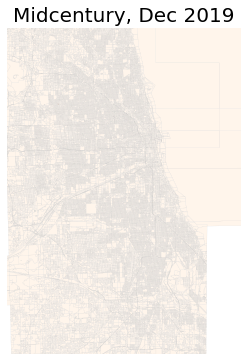

In [102]:
variable = 'entry'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_Midcentury.plot(column=variable, cmap='Oranges', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='Midcentury, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'Midcentury_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'Comcast, Dec 2019')

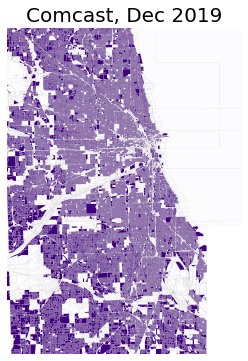

In [103]:
variable = 'entry'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_Comcast.plot(column=variable, cmap='Purples', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='Comcast, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'Comcast_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'Google, Dec 2019')

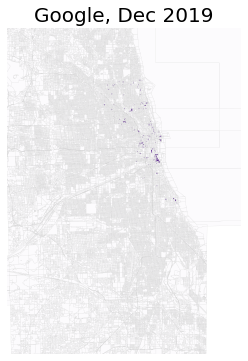

In [104]:
variable = 'entry'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_Google.plot(column=variable, cmap='Purples', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='Google, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'Google_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'AT&T, Dec 2019')

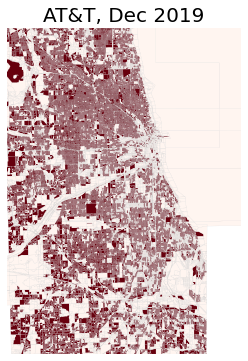

In [105]:
variable = 'entry'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_ATT.plot(column=variable, cmap='Reds', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='AT&T, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'ATT_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'Grande, Dec 2019')

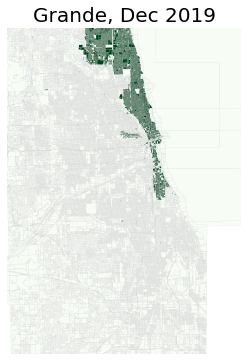

In [106]:
variable = 'entry'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_Radiate.plot(column=variable, cmap='Greens', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='Grande, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'Grande_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'Verizon, Dec 2019')

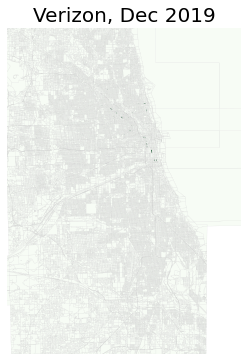

In [107]:
variable = 'entry'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_Verizon.plot(column=variable, cmap='Greens', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='Verizon, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'Verizon_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight')  

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'Charter, Dec 2019')

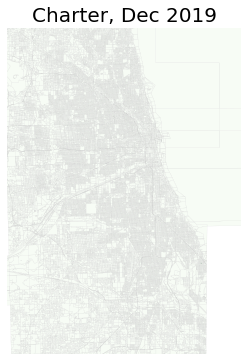

In [108]:
variable = 'entry'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_Charter.plot(column=variable, cmap='Greens', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='Charter, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'Charter_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 

<AxesSubplot:>

(-88.32112425, -87.05354474999997, 41.4352856, 42.1885304)

Text(0.5, 1.0, 'XL Broadband, Dec 2019')

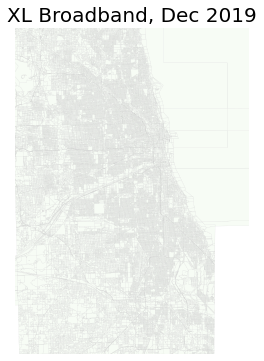

In [109]:
variable = 'entry'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
fullmap_XL.plot(column=variable, cmap='Greens', linewidth=0.1, ax=ax, legend=False, edgecolor='0.8')
ax.axis('off')
# add a title
title='XL Broadband, '+month+' '+year
ax.set_title(title, fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.margins(-0.3, -0.15)
fig.savefig('Illinois/'+'XL_'+month+year+'.jpg', dpi=500, orientation='portrait', bbox_inches='tight') 